In [2]:
! gdown 1CWwwqFN0ICFfI00U2nVkqOLxB8SFNHK9
! wget https://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

Downloading...
From: https://drive.google.com/uc?id=1CWwwqFN0ICFfI00U2nVkqOLxB8SFNHK9
To: /content/FA-KES-Dataset.csv
100% 1.62M/1.62M [00:00<00:00, 135MB/s]
--2022-12-30 18:04:45--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-30 18:04:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.12MB/s    in 2m 41s  

2022-12-30 18:07:27 (5.12 MB/

In [3]:
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import utils, layers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns
import re

# NLP 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
df = pd.read_csv('FA-KES-Dataset.csv', encoding='unicode_escape')
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [6]:
print('size:', len(df))
print('labels:', df['labels'].unique())

size: 804
labels: [0 1]


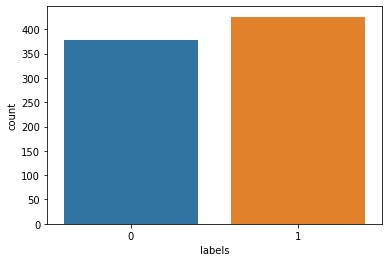

In [7]:
sns.countplot(data=df, x='labels')
plt.show()

In [8]:
df['article_content'].str.contains('https').sum()

14

In [9]:
df['article_content'] = df['article_content'].str.replace(r'http\S+', '', regex=True)
df['article_content'].str.contains('https').sum()

0

In [10]:
stop = stopwords.words('english')
df['article_content'] = df['article_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 0914 Homs governor says U.S. a...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll Aleppo bomb attack ...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead Fighting ...,nna,7/10/2016,aleppo,0


In [11]:
stemmer = SnowballStemmer("english")

df['article_content'] = df['article_content'].apply(
        lambda x: ' '.join([stemmer.stem(y) for y in x.split()])
    )
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,wed 05 apr 2017 syria attack symptom consist n...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,fri 07 apr 2017 0914 hom governor say u.s. att...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,sun 16 apr 2017 death toll aleppo bomb attack ...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,wed 19 apr 2017 aleppo bomb blast kill six syr...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,sun 10 jul 2016 29 syria rebel dead fight key ...,nna,7/10/2016,aleppo,0


In [12]:
days = ['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
date_words = [str(i) for i in range(1970, 2023)] + days + [str(i).zfill(2) for i in range(1, 32)] + months

df['article_content'] = df['article_content'].apply(lambda x: ' '.join([y for y in x.split() if y not in date_words]))
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,syria attack symptom consist nerv agent use wh...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,0914 hom governor say u.s. attack caus death d...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,death toll aleppo bomb attack least 112. the d...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,aleppo bomb blast kill six syrian state tv. a ...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,syria rebel dead fight key aleppo road. at lea...,nna,7/10/2016,aleppo,0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(
        df['article_content'].to_numpy(), df['labels'].to_numpy(), 
        test_size=0.2, random_state=312
)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((643,), (161,), (643,), (161,))

In [17]:
t_train = Tokenizer()
print(x_train[0])
t_train.fit_on_texts(df['article_content'])
x_train = t_train.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=100, padding='post')
print(x_train[0])

aleppo bomb blast kill six syrian state tv. a bomb blast kill six peopl injur 32 salah al-din district aleppo syrian state televis report wednesday without give details. salah al-din locat west aleppo old citi district part last rebel enclav taken syrian armi advanc december. --reuter
[   8   28  159    4  170    3   31  376   38   28  159    4  170   10
   26  834 1135    5 1773  119    8    3   31  528   24   97  615  832
 2294 1135    5 1773  262  207    8  315   16  119   93   85   15 1977
  356    3   21  222 2504  272    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [18]:
print(x_test[0])
x_test = t_train.texts_to_sequences(x_test)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=100, padding='post')
print(x_test[0])

22-04-2016 syrian armi kill isil terrorist hama. syrian armi unit cover syrian air forc target hideout gather terrorist isil al-nusra front (qaeda branch levant) terrorist organ across countri syrian armi unit cover syrian air forc target hideout gather terrorist isil al-nusra front (qaeda branch levant) terrorist organ across countri kill dozen destroy vehicl equipment. hama an armi unit cover syrian air forc clash al-nusra jund al-aqsa terrorist al-tamanaa skeik atshan tri attack residenti area direct maan km north hama citi militari sourc told sana friday. the attack foil terrorist kill includ one al-nusra leader atshan nicknam abu moussa sourc confirmed. two vehicl equip heavi machinegun 3 cannon destroy confrontations. hom the syrian air forc carri airstrik concentr movement isil terrorist north palmyra citi around warehous area eastern countrysid hom province. a militari sourc told sana airstrik result kill mani member isil destroy number vehicl equip machineguns. later sourc sai

In [19]:
x_train = [np.array(x, dtype=float) for x in x_train]
x_test = [np.array(x, dtype=float) for x in x_test]
x_train, x_test = np.array(x_train, dtype=float), np.array(x_test, dtype=float)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((643, 100), (161, 100), (643,), (161,))

In [20]:
embeddings_index = dict()
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [21]:
embedding_matrix = np.zeros((len(t_train.word_index)+1, 300))
for word, i in t_train.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim= len(t_train.word_index) + 1,
                            output_dim= 300,
                            weights=[embedding_matrix], # GloVe
                            input_length= 100,
                            trainable= False))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 300)          2540700   
                                                                 
 conv1d_13 (Conv1D)          (None, 96, 128)           192128    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 48, 128)          0         
 g1D)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 48, 32)            20608     
                                                                 
 flatten_6 (Flatten)         (None, 1536)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 1537      
                                                     

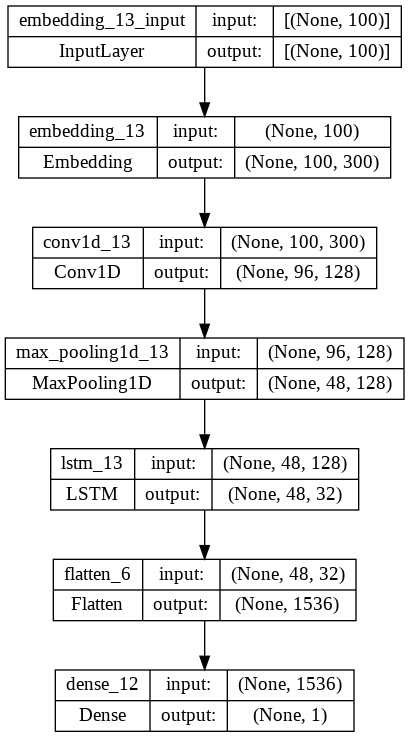

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

es = EarlyStopping(patience=3, 
                    monitor='val_accuracy',
                    restore_best_weights=True)

history = model.fit(
    x_train, y_train, epochs=10, batch_size=64, 
    validation_data=(x_test, y_test),
    callbacks=[es]
)

Epoch 1/10
11/11 [==============================] - 4s 185ms/step - loss: 0.7035 - accuracy: 0.4992 - val_loss: 0.7281 - val_accuracy: 0.4348
Epoch 2/10
11/11 [==============================] - 1s 128ms/step - loss: 0.6120 - accuracy: 0.6781 - val_loss: 0.6869 - val_accuracy: 0.5776
Epoch 3/10
11/11 [==============================] - 1s 132ms/step - loss: 0.5202 - accuracy: 0.8491 - val_loss: 0.7037 - val_accuracy: 0.5963
Epoch 4/10
11/11 [==============================] - 1s 132ms/step - loss: 0.4374 - accuracy: 0.8569 - val_loss: 0.7869 - val_accuracy: 0.4969
Epoch 5/10
11/11 [==============================] - 1s 132ms/step - loss: 0.3043 - accuracy: 0.9269 - val_loss: 0.9431 - val_accuracy: 0.5093
Epoch 6/10
11/11 [==============================] - 1s 132ms/step - loss: 0.2201 - accuracy: 0.9378 - val_loss: 0.9268 - val_accuracy: 0.5404


6/6 [==============================] - 0s 49ms/step


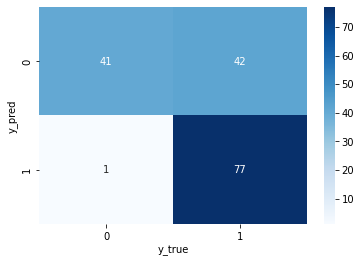

In [26]:
y_pred = model.predict(x_test)
threshold = 0.5
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
ax.set(xlabel="y_true", ylabel="y_pred")
plt.show()

In [27]:
model.save('fake_model.h5')

In [25]:
y_pred = model.predict(x_test)
threshold = 0.5
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

           0       0.98      0.49      0.66        83
           1       0.65      0.99      0.78        78

    accuracy                           0.73       161
   macro avg       0.81      0.74      0.72       161
weighted avg       0.82      0.73      0.72       161



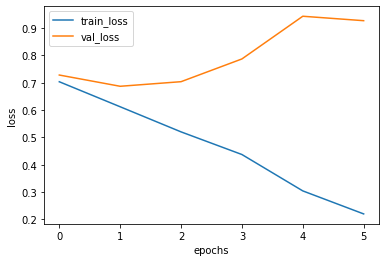

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

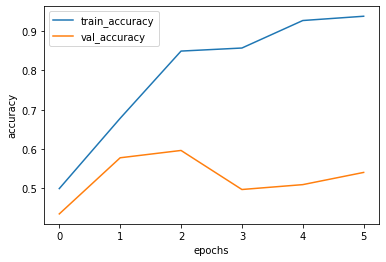

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
model_RNN = Sequential()
model_RNN.add(layers.Embedding(input_dim= len(t_train.word_index) + 1,
                            output_dim= 300,
                            weights=[embedding_matrix], # GloVe
                            input_length= 100,
                            trainable= False))
model_RNN.add(layers.LSTM(64))
model_RNN.add(layers.Dense(1, activation='sigmoid'))
model_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          2540700   
                                                                 
 lstm_1 (LSTM)               (None, 64)                93440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,634,205
Trainable params: 93,505
Non-trainable params: 2,540,700
_________________________________________________________________


In [31]:
model_RNN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

es = EarlyStopping(patience=10, 
                    monitor='val_accuracy',
                    restore_best_weights=True)

history = model_RNN.fit(
    x_train, y_train, epochs=10, batch_size=64, 
    validation_data=(x_test, y_test),
    callbacks=[es]
)

Epoch 1/10
11/11 [==============================] - 4s 197ms/step - loss: 0.6939 - accuracy: 0.5226 - val_loss: 0.6958 - val_accuracy: 0.4969
Epoch 2/10
11/11 [==============================] - 2s 146ms/step - loss: 0.6673 - accuracy: 0.5941 - val_loss: 0.7011 - val_accuracy: 0.5031
Epoch 3/10
11/11 [==============================] - 2s 146ms/step - loss: 0.6546 - accuracy: 0.6361 - val_loss: 0.6943 - val_accuracy: 0.5404
Epoch 4/10
11/11 [==============================] - 2s 146ms/step - loss: 0.6438 - accuracy: 0.6392 - val_loss: 0.6973 - val_accuracy: 0.5342
Epoch 5/10
11/11 [==============================] - 2s 143ms/step - loss: 0.6290 - accuracy: 0.6470 - val_loss: 0.7062 - val_accuracy: 0.5280
Epoch 6/10
11/11 [==============================] - 2s 147ms/step - loss: 0.6081 - accuracy: 0.6734 - val_loss: 0.7369 - val_accuracy: 0.5342
Epoch 7/10
11/11 [==============================] - 2s 146ms/step - loss: 0.6139 - accuracy: 0.6547 - val_loss: 0.7159 - val_accuracy: 0.5404
Epoch 

6/6 [==============================] - 1s 47ms/step


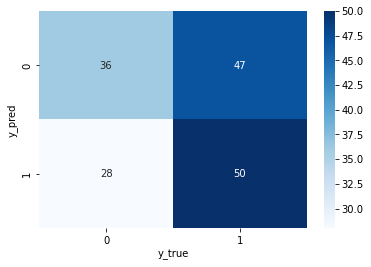

In [33]:
y_pred = model_RNN.predict(x_test)
threshold = 0.5
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
ax.set(xlabel="y_true", ylabel="y_pred")
plt.show()

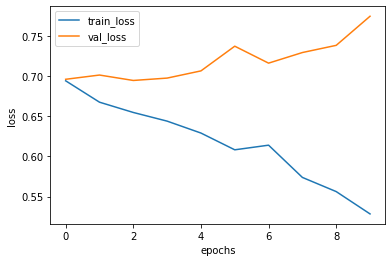

In [34]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

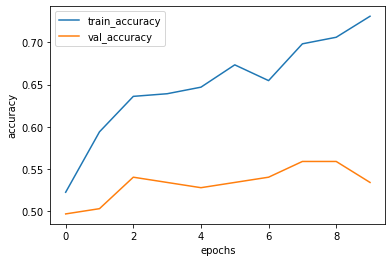

In [35]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
y_pred = model_RNN.predict(x_test)
threshold = 0.5
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 60ms/step
              precision    recall  f1-score   support

           0       0.56      0.43      0.49        83
           1       0.52      0.64      0.57        78

    accuracy                           0.53       161
   macro avg       0.54      0.54      0.53       161
weighted avg       0.54      0.53      0.53       161

